In [2]:
import uproot
import numpy as np
import sys
import os
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import itertools
import awkward as ak
%matplotlib inline

In [3]:
#file = uproot.open("tracking_losses_ntuple_Bd2KstEE.root:PrDebugTrackingLosses.PrDebugTrackingTool/Tuple;1")
file = uproot.open("tracking_losses_ntuple_Dst0ToD0EE.root:PrDebugTrackingLosses.PrDebugTrackingTool/Tuple;1")


"""
#file.keys()
#file.show()
vertices = file.arrays(["all_endvtx_x", "all_endvtx_y", "all_endvtx_z"])
vt_length = file.arrays(["all_endvtx_x_length", "all_endvtx_y_length", "all_endvtx_z_length"])
vert_len = vt_length["all_endvtx_x_length"]

vtx = vertices["all_endvtx_x"]
vty = vertices["all_endvtx_y"]
vtz = vertices["all_endvtx_z"]

isElectron = file["isElectron"].array()
lost = file["lost_in_track_fit"].array()

fromPairProd = file["fromPairProd"].array()

#vt_length["all_endvtx_y_length"]
#vertices

#array[array.isElectron]
"""

allcolumns = file.arrays()
tracked = allcolumns[(allcolumns.isElectron) & (~allcolumns.lost)] #D: 42422
lost = allcolumns[(allcolumns.isElectron) & (allcolumns.lost)] #D: 27072

#n_cuts = []
#n_cuts.append(ak.num(allcolumns, axis=0))

"""
#cut 
tcut = ((tracked["eta"]<5.0) & (tracked["eta"]>1.9))
lcut = ((lost["eta"]<5.0) & (lost["eta"]>1.9))

tracked = tracked[tcut]
lost = lost[lcut]
"""

#n_cuts.append(ak.num(tracked, axis=0) + ak.num(lost, axis=0))

#~ := logical not 
#allc_isE= allcolumns[(~allcolumns.isElectron) & (bool 2)]

#ak.num(lost, axis=0)

'\n#cut \ntcut = ((tracked["eta"]<5.0) & (tracked["eta"]>1.9))\nlcut = ((lost["eta"]<5.0) & (lost["eta"]>1.9))\n\ntracked = tracked[tcut]\nlost = lost[lcut]\n'

In [63]:
#CutFlow


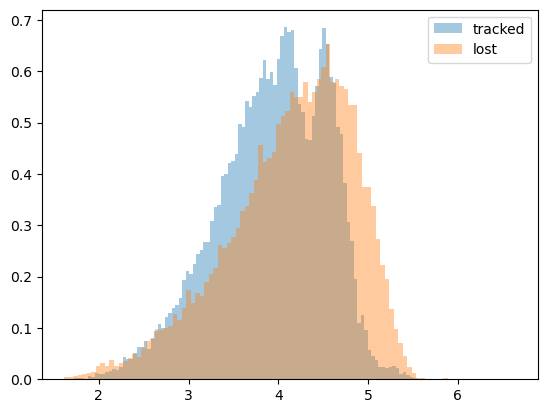

In [5]:
colors = ['blue', 'darkorange']
labels = ["tracked", "lost"]
#ak.num(ctracked, axis=0)

plt.hist(ak.ravel(tracked["eta"]), bins=100, density=True, alpha=0.4, label="tracked")
plt.hist(ak.ravel(lost["eta"]), bins =100, density=True, alpha=0.4, label="lost")
plt.legend()
plt.show()

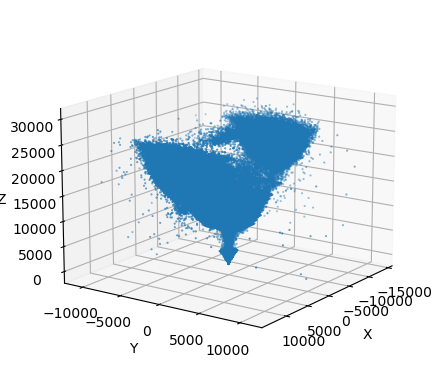

In [16]:
#vtx[particle][index of vertex]

vtx_x = ak.ravel(allcolumns.all_endvtx_x)
vtx_y = ak.ravel(allcolumns.all_endvtx_y)
vtx_z = ak.ravel(allcolumns.all_endvtx_z)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(vtx_x, vtx_y, vtx_z, marker=".", s=1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(15, 35)

plt.show()

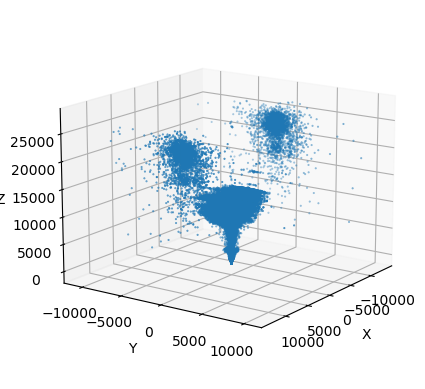

In [17]:
#create an array with all electron indices
electron = allcolumns[(allcolumns.isElectron)]
#electron.show()
#electron_ind = electron[electron.]
#electron_ind = electron_ind.to_numpy()
e_vtx_x = ak.ravel(electron.all_endvtx_x)
e_vtx_y = ak.ravel(electron.all_endvtx_y)
e_vtx_z = ak.ravel(electron.all_endvtx_z)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(e_vtx_x, e_vtx_y, e_vtx_z, marker=".", s=1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(15, 35)

plt.show()

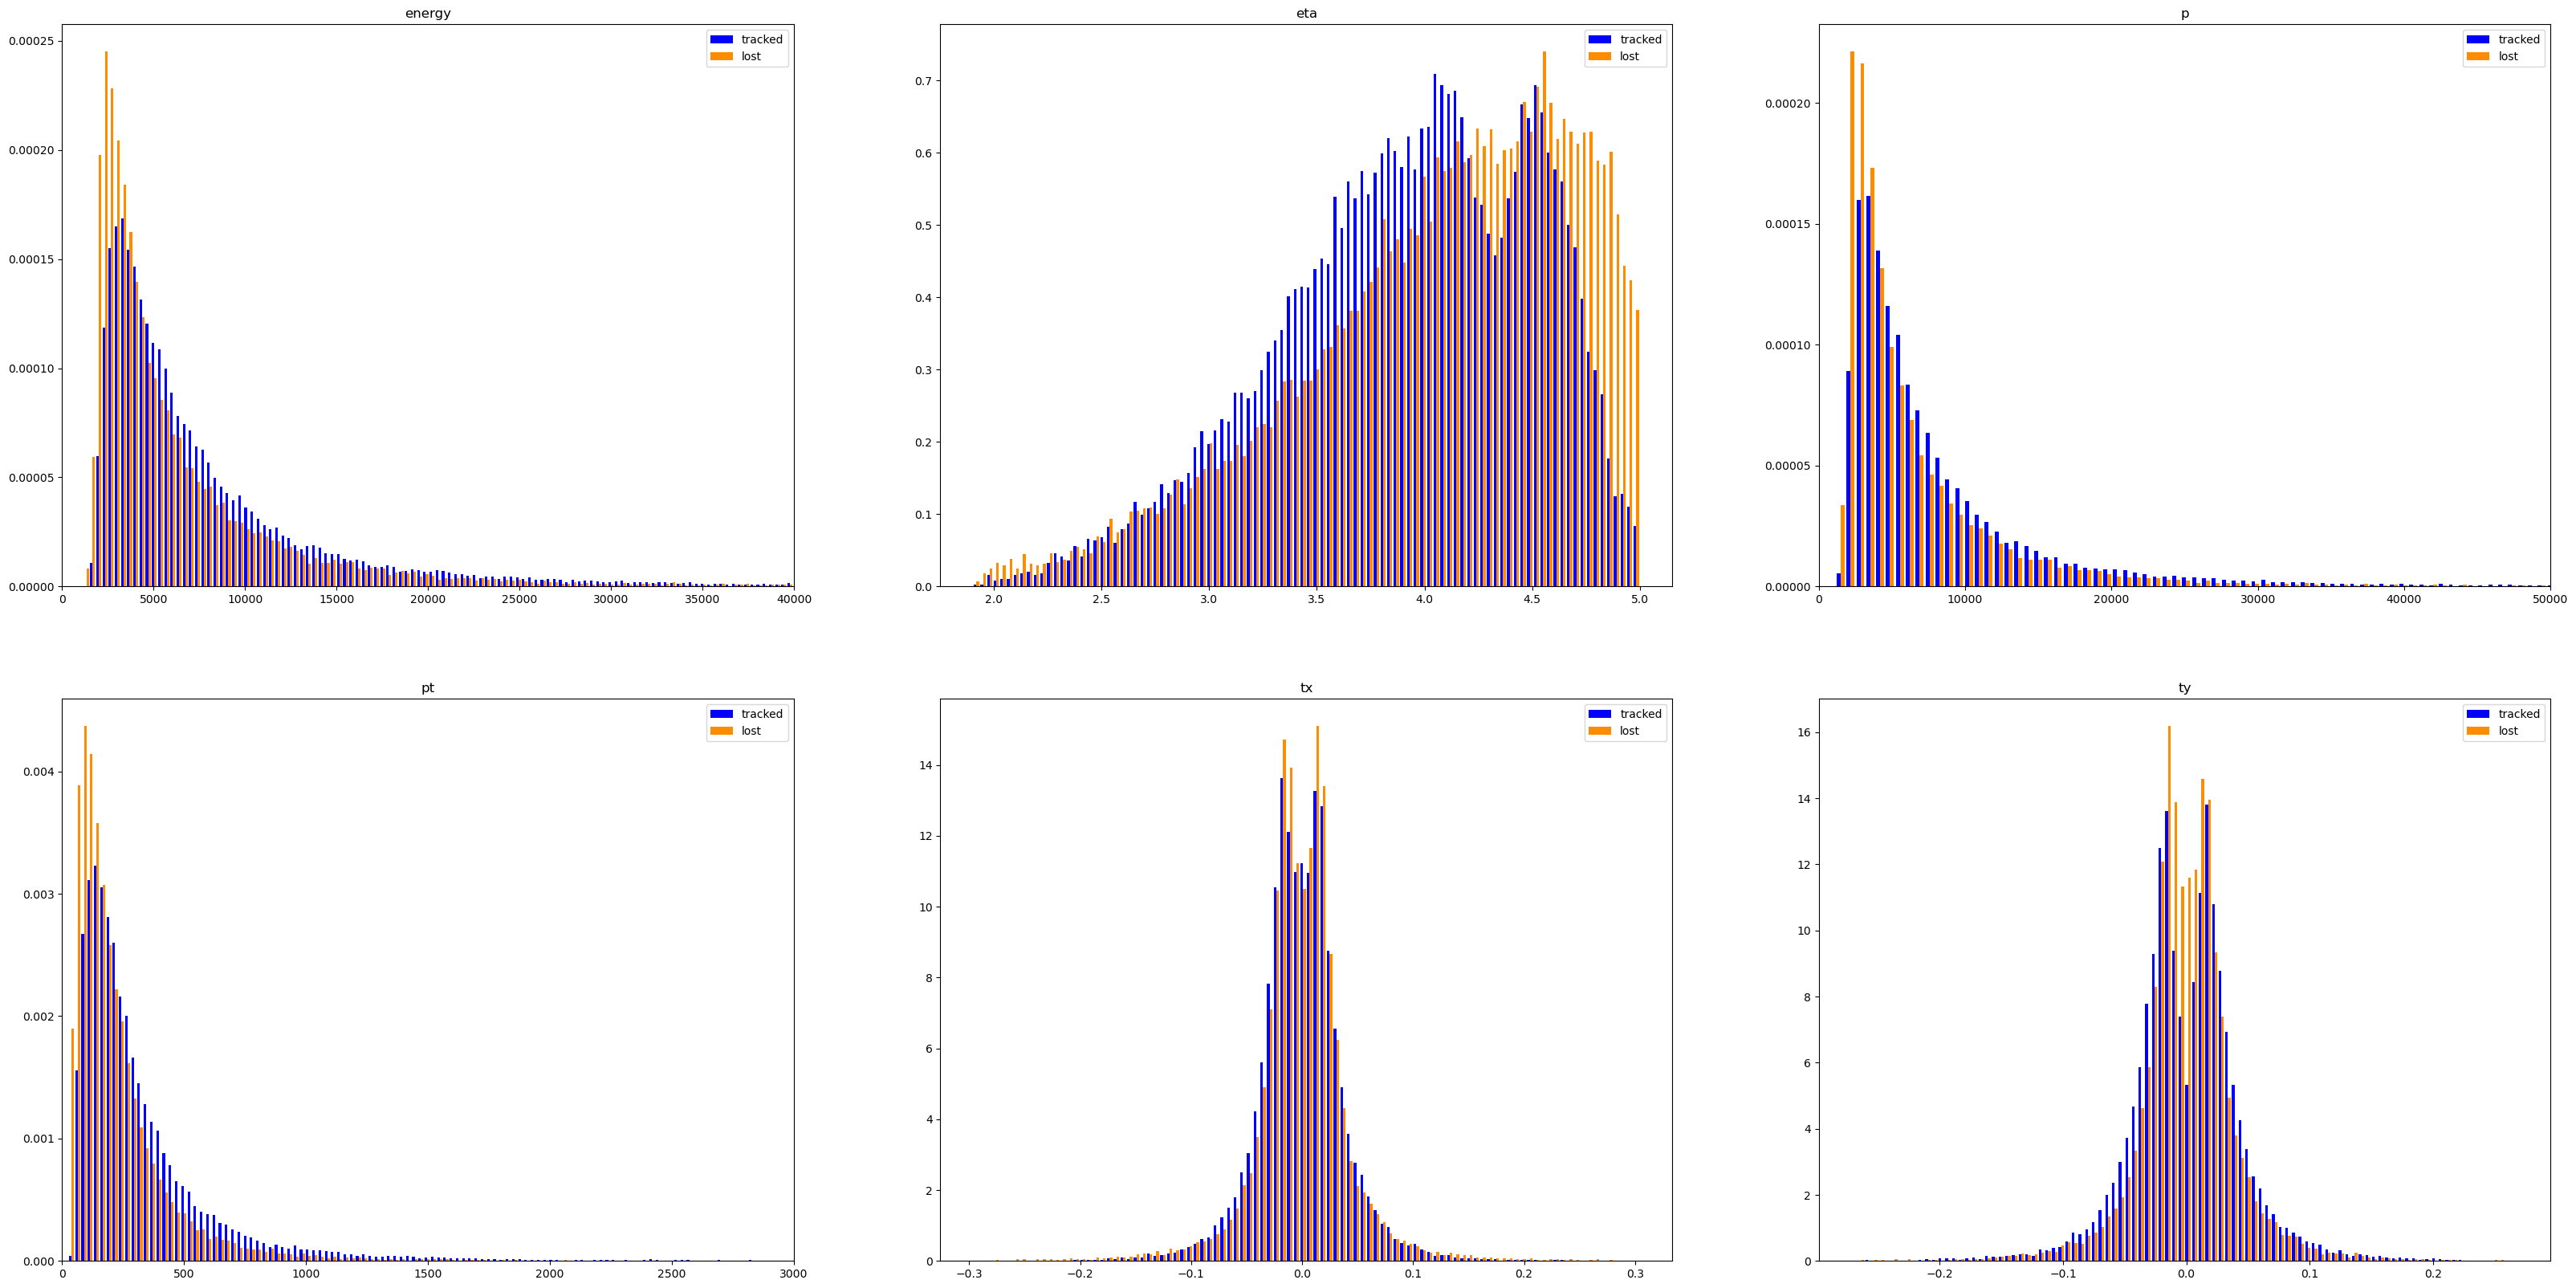

In [43]:
fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(nrows=2, ncols=3, figsize=(40,20))

colors = ['blue', 'darkorange']
labels = ["tracked", "lost"]

ax0.hist([ak.ravel(tracked["energy"]),ak.ravel(lost["energy"])], 1000, density=True, histtype='bar', color=colors, label=labels)
ax0.legend()
ax0.set_xlim(0,40000)
ax0.set_title('energy')

ax1.hist([ak.ravel(tracked["eta"]), ak.ravel(lost["eta"])], bins=100, density=True, color=colors, label=labels)
ax1.legend()
ax1.set_title('eta')

ax2.hist([ak.ravel(tracked["p"]),ak.ravel(lost["p"])], 500, density=True, histtype='bar', color=colors, label=labels)
ax2.legend()
ax2.set_xlim(0,50000)
ax2.set_title('p')

ax3.hist([ak.ravel(tracked["pt"]),ak.ravel(lost["pt"])], 500, density=True, histtype='bar', color=colors, label=labels)
ax3.legend()
ax3.set_xlim(0,3000)
ax3.set_title('pt')

ax4.hist([ak.ravel(tracked["tx"]),ak.ravel(lost["tx"])], 100, density=True, histtype='bar', color=colors, label=labels)
ax4.legend()
ax4.set_title('tx')

ax5.hist([ak.ravel(tracked["ty"]),ak.ravel(lost["ty"])], 100, density=True, histtype='bar', color=colors, label=labels)
ax5.legend()
ax5.set_title('ty')

plt.show()


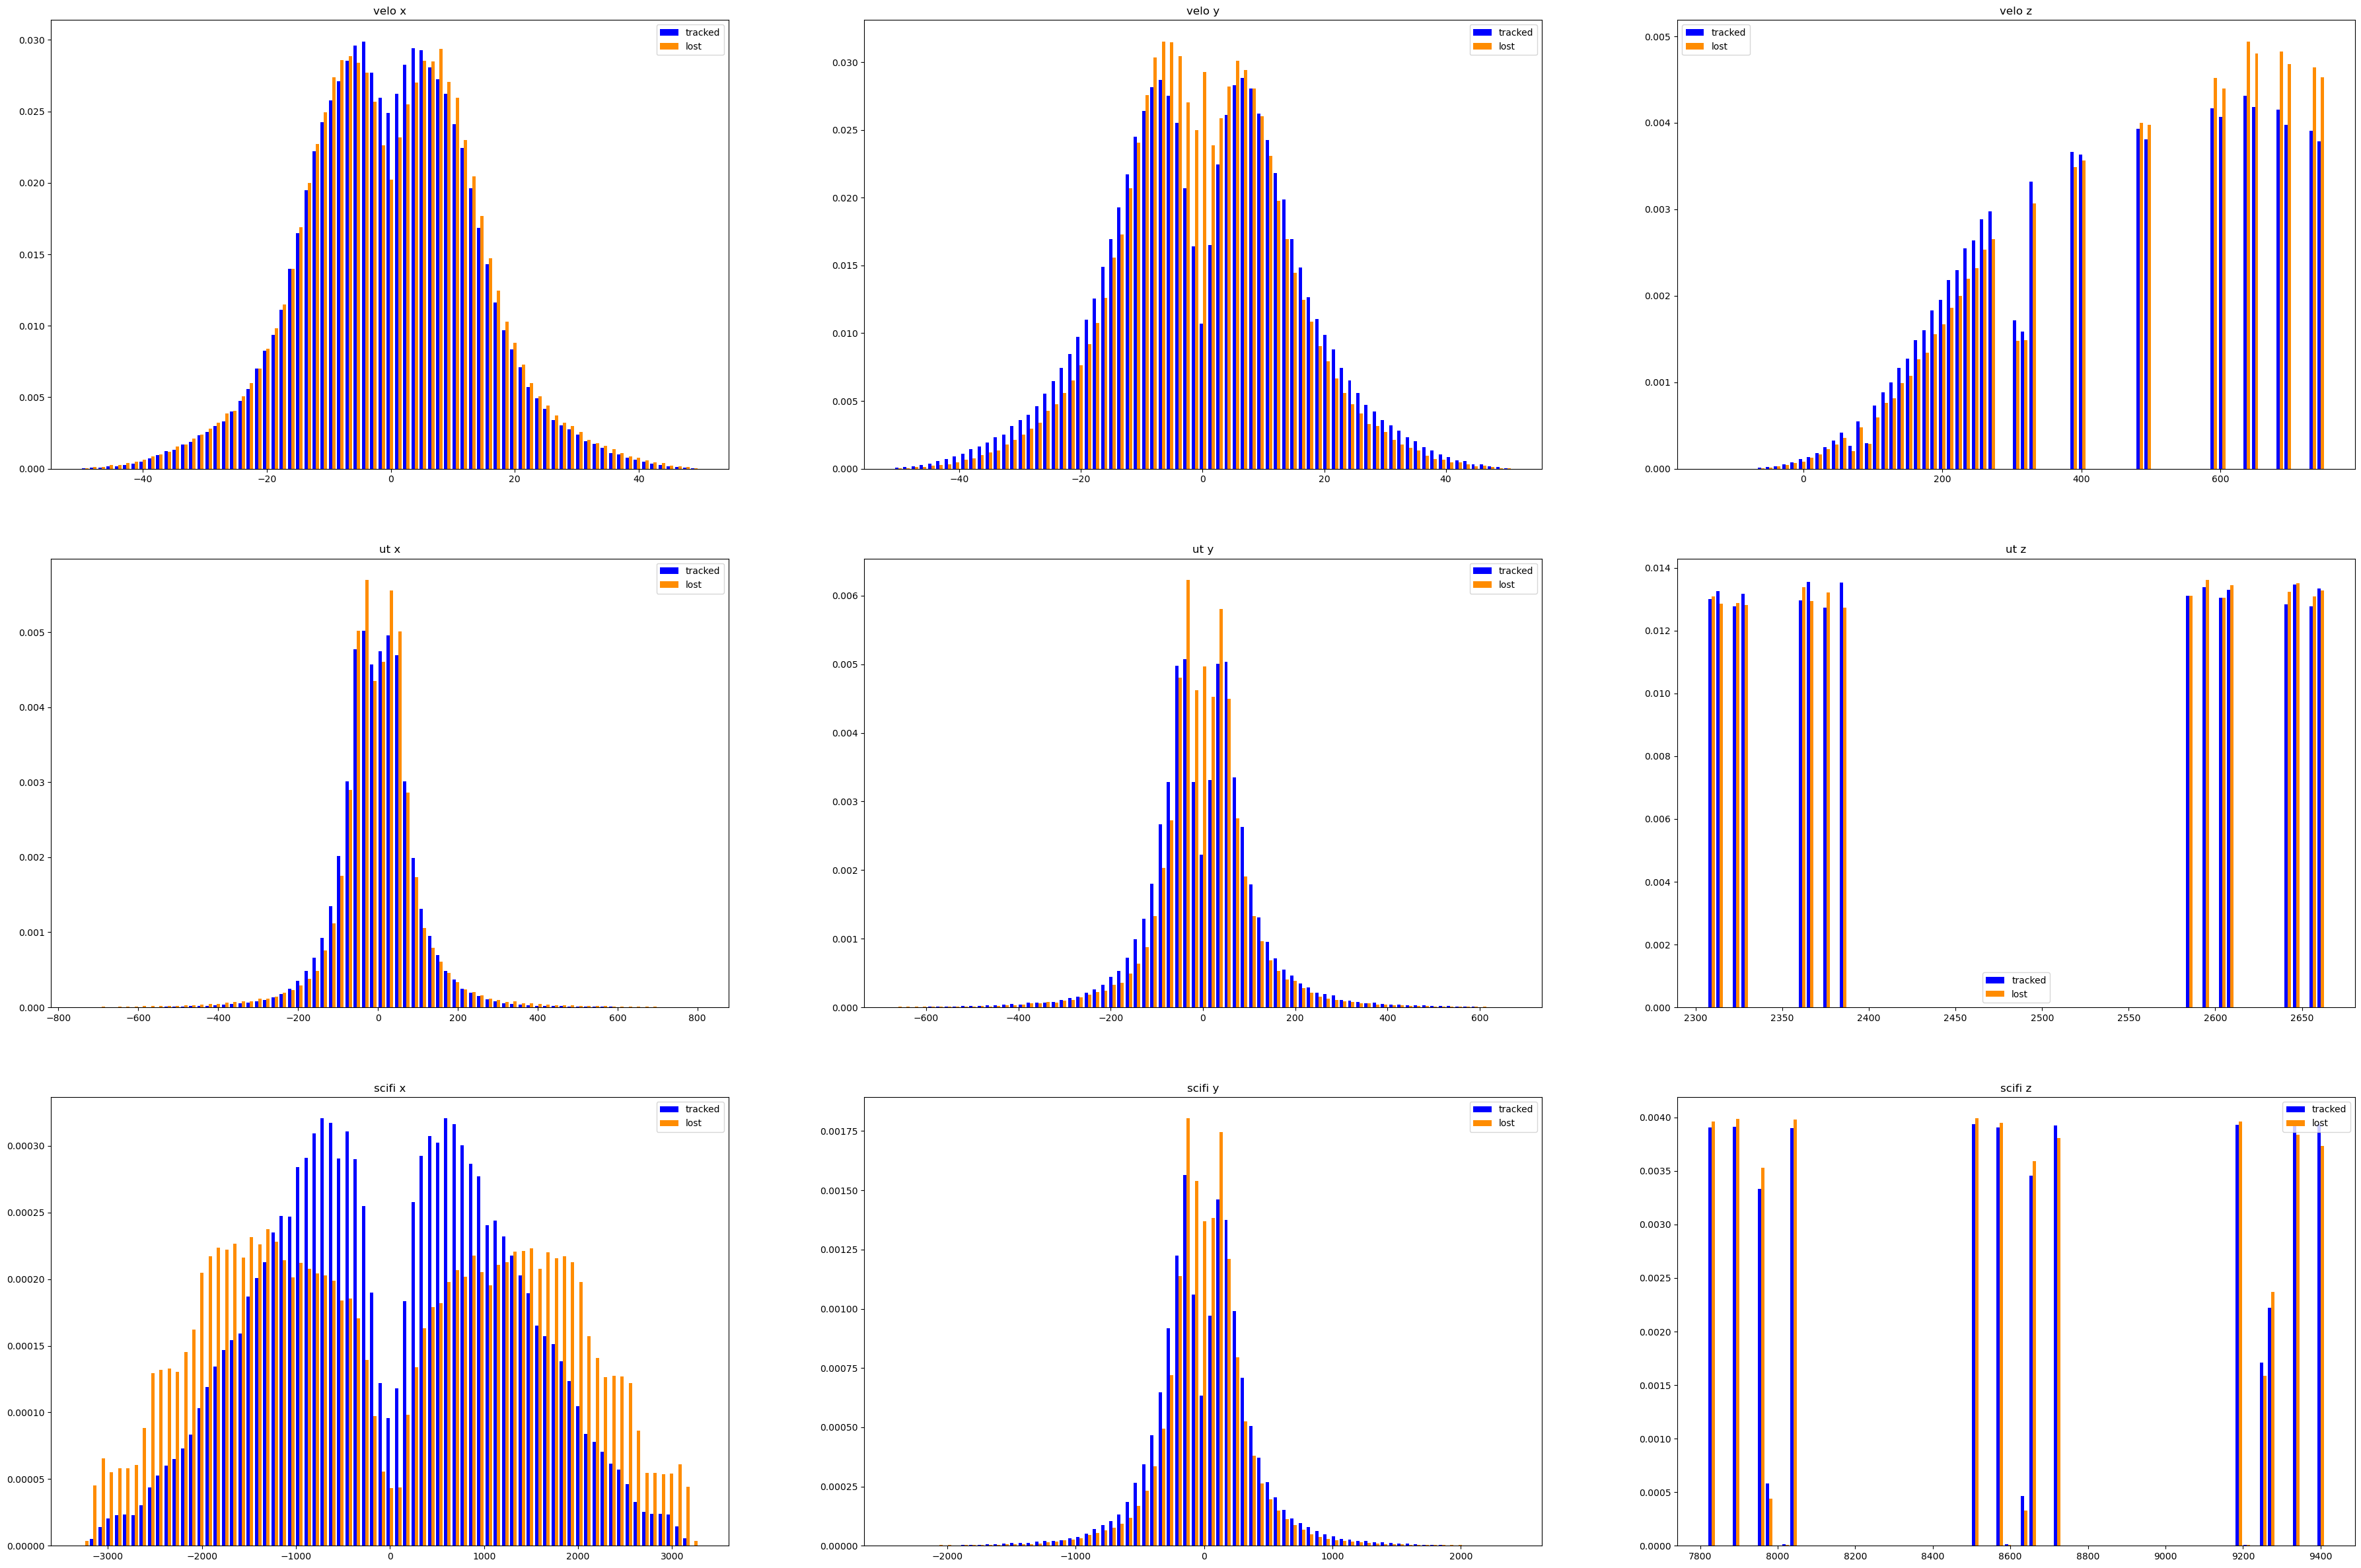

In [44]:
fig, ((ax0, ax1, ax2), (ax3, ax4, ax5), (ax6, ax7, ax8)) = plt.subplots(nrows=3, ncols=3, figsize=(45,30))

colors = ['blue', 'darkorange']
labels = ["tracked", "lost"]
n_bins=75

ax0.hist([ak.ravel(tracked["velo_hit_pos_x"]),ak.ravel(lost["velo_hit_pos_x"])], n_bins, density=True, histtype='bar', color=colors, label=labels)
ax0.legend()
ax0.set_title('velo x')

ax1.hist([ak.ravel(tracked["velo_hit_pos_y"]),ak.ravel(lost["velo_hit_pos_y"])], n_bins, density=True, histtype='bar', color=colors, label=labels)
ax1.legend()
ax1.set_title('velo y')

ax2.hist([ak.ravel(tracked["velo_hit_pos_z"]),ak.ravel(lost["velo_hit_pos_z"])], n_bins, density=True, histtype='bar', color=colors, label=labels)
ax2.legend()
ax2.set_title('velo z')

ax3.hist([ak.ravel(tracked["ut_hit_pos_x"]),ak.ravel(lost["ut_hit_pos_x"])], n_bins, density=True, histtype='bar', color=colors, label=labels)
ax3.legend()
ax3.set_title('ut x')

ax4.hist([ak.ravel(tracked["ut_hit_pos_y"]),ak.ravel(lost["ut_hit_pos_y"])], n_bins, density=True, histtype='bar', color=colors, label=labels)
ax4.legend()
ax4.set_title('ut y')

ax5.hist([ak.ravel(tracked["ut_hit_pos_z"]),ak.ravel(lost["ut_hit_pos_z"])], n_bins, density=True, histtype='bar', color=colors, label=labels)
ax5.legend()
ax5.set_title('ut z')

ax6.hist([ak.ravel(tracked["scifi_hit_pos_x"]),ak.ravel(lost["scifi_hit_pos_x"])], n_bins, density=True, histtype='bar', color=colors, label=labels)
ax6.legend()
ax6.set_title('scifi x')

ax7.hist([ak.ravel(tracked["scifi_hit_pos_y"]),ak.ravel(lost["scifi_hit_pos_y"])], n_bins, density=True, histtype='bar', color=colors, label=labels)
ax7.legend()
ax7.set_title('scifi y')

ax8.hist([ak.ravel(tracked["scifi_hit_pos_z"]),ak.ravel(lost["scifi_hit_pos_z"])], n_bins, density=True, histtype='bar', color=colors, label=labels)
ax8.legend()
ax8.set_title('scifi z')


#fig.tight_layout()
plt.show()

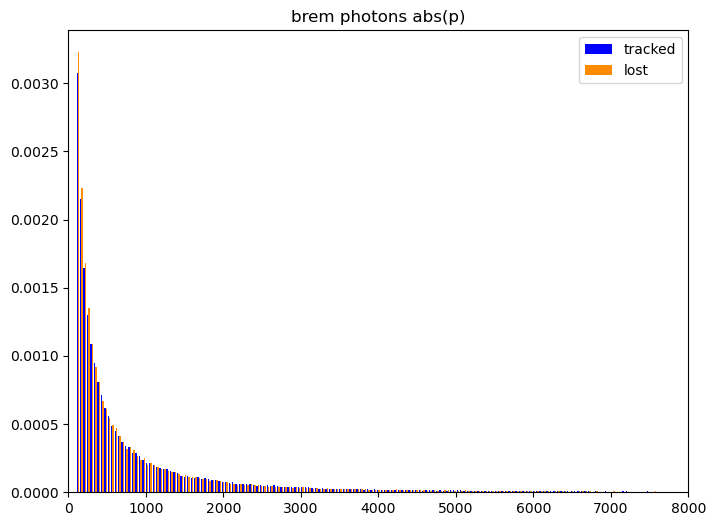

In [45]:
plt.figure(figsize=(8,6))
plt.hist([ak.ravel(tracked["brem_photons_pe"]), ak.ravel(lost["brem_photons_pe"])], 5000, density=True, histtype="bar", color=colors, label=labels)
plt.xlim(0,8000)
plt.title("brem photons abs(p)")
plt.legend()
plt.show()

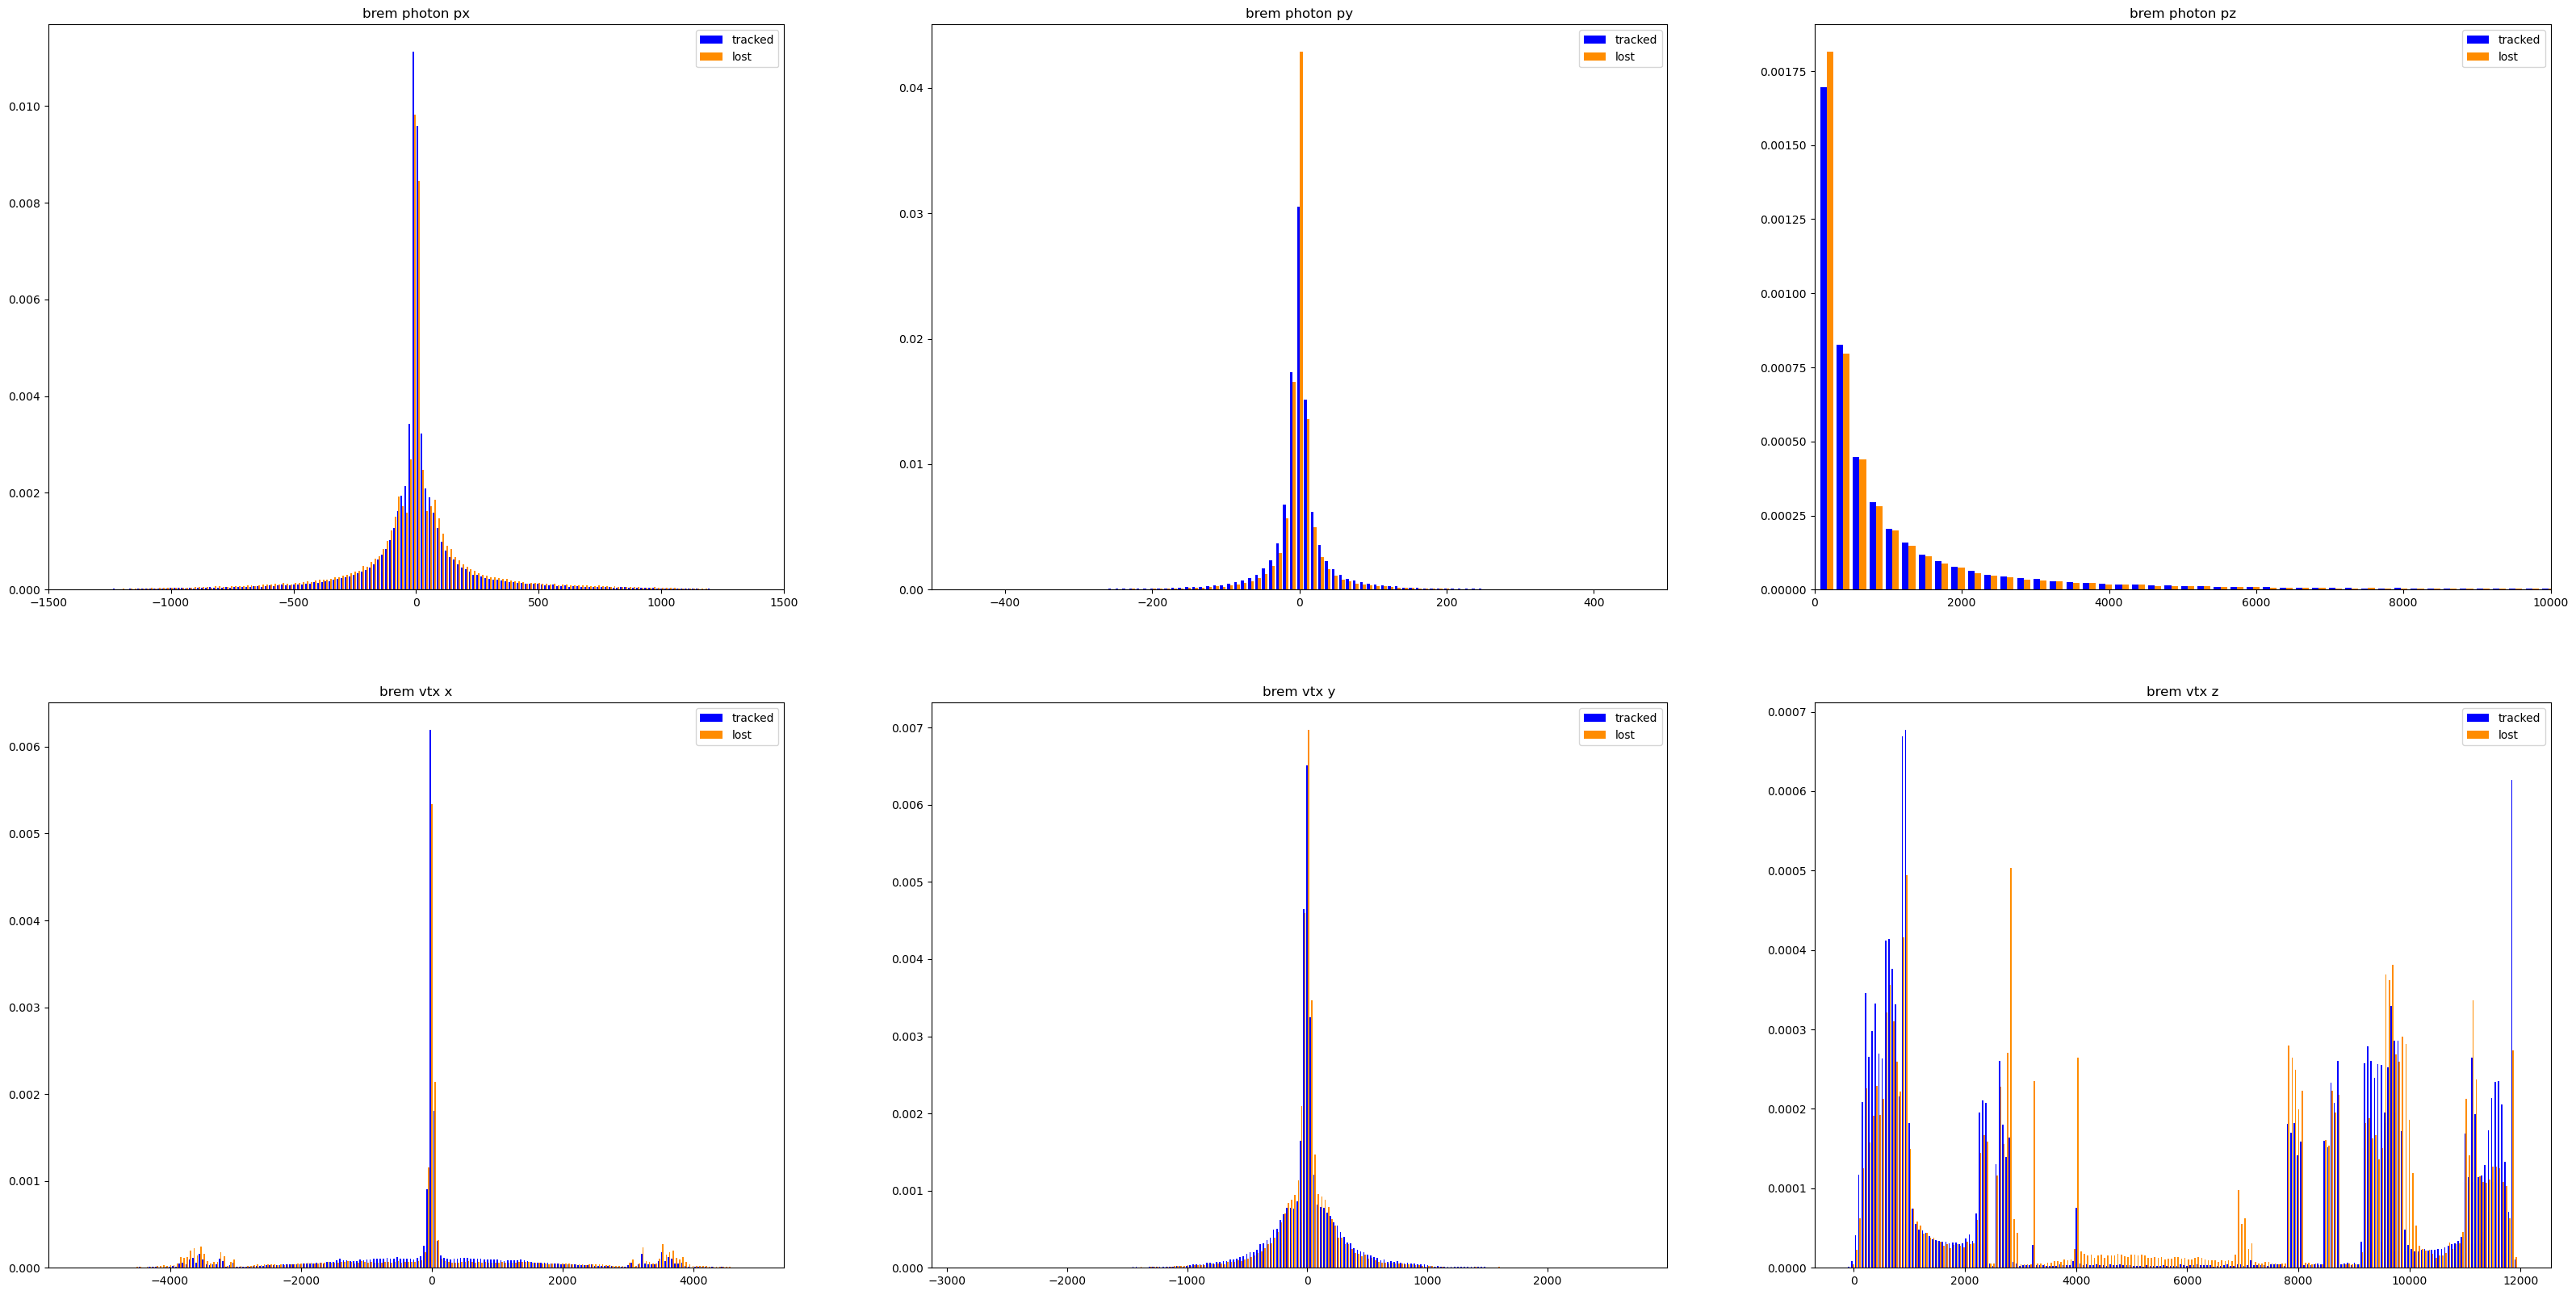

In [46]:
fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(nrows=2, ncols=3, figsize=(40,20))

colors = ['blue', 'darkorange']
labels = ["tracked", "lost"]
n_bins=200

ax0.hist([ak.ravel(tracked["brem_photons_px"]),ak.ravel(lost["brem_photons_px"])], 500, density=True, histtype='bar', color=colors, label=labels)
ax0.legend()
ax0.set_xlim(-1500,1500)
ax0.set_title('brem photon px')

ax1.hist([ak.ravel(tracked["brem_photons_py"]),ak.ravel(lost["brem_photons_py"])], 1000, density=True, histtype='bar', color=colors, label=labels)
ax1.legend()
ax1.set_xlim(-500,500)
ax1.set_title('brem photon py')

ax2.hist([ak.ravel(tracked["brem_photons_pz"]),ak.ravel(lost["brem_photons_pz"])], 1000, density=True, histtype='bar', color=colors, label=labels)
ax2.legend()
ax2.set_xlim(0,10000)
ax2.set_title('brem photon pz')

ax3.hist([ak.ravel(tracked["brem_vtx_x"]),ak.ravel(lost["brem_vtx_x"])], n_bins, density=True, histtype='bar', color=colors, label=labels)
ax3.legend()
ax3.set_title('brem vtx x')

ax4.hist([ak.ravel(tracked["brem_vtx_y"]),ak.ravel(lost["brem_vtx_y"])], n_bins, density=True, histtype='bar', color=colors, label=labels)
ax4.legend()
ax4.set_title('brem vtx y')

ax5.hist([ak.ravel(tracked["brem_vtx_z"]),ak.ravel(lost["brem_vtx_z"])], n_bins, density=True, histtype='bar', color=colors, label=labels)
ax5.legend()
ax5.set_title('brem vtx z')

plt.show()

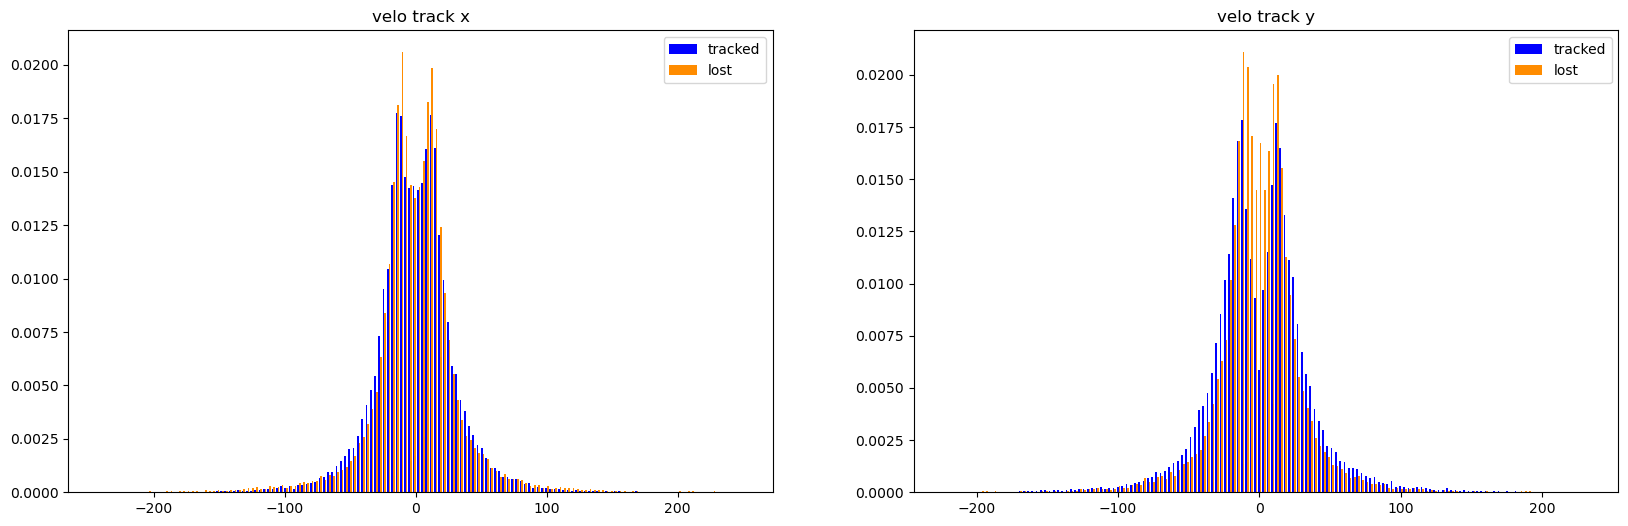

In [54]:
fig, ((ax0, ax1)) = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

ax0.hist([ak.ravel(tracked["velo_track_x"]), ak.ravel(lost["velo_track_x"])], bins=150, density=True, histtype='bar', color=colors, label=labels)
ax0.legend()
ax0.set_title('velo track x')

ax1.hist([ak.ravel(tracked["velo_track_y"]), ak.ravel(lost["velo_track_y"])],bins=150, density=True, histtype='bar', color=colors, label=labels)
ax1.legend()
ax1.set_title('velo track y')

plt.show()

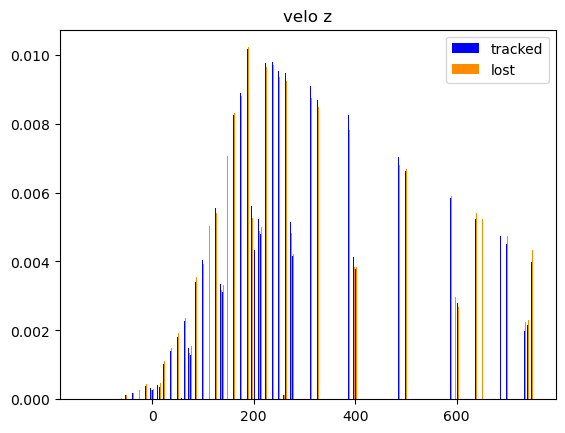

In [37]:
"""
#cut experimentation

zcut = (ak.any(tracked["velo_hit_pos_z"]<200, axis=-1) & ak.any(tracked["velo_hit_pos_z"]>-200, axis=-1))
zlc = (ak.any(lost["velo_hit_pos_z"]<200, axis=-1) & ak.any(lost["velo_hit_pos_z"]>-200, axis=-1))
ztr = tracked[zcut]
zlo = lost[zlc]

colors = ['blue', 'darkorange']
labels = ["tracked", "lost"]
n_bins=200

plt.hist([ak.ravel(ztr["velo_hit_pos_z"]),ak.ravel(zlo["velo_hit_pos_z"])], bins=n_bins, density=True, histtype='bar', color=colors, label=labels)
plt.legend()
plt.title('velo z')
plt.show()
"""

In [24]:
tracked[1].tolist()

{'all_endvtx_types_length': 3,
 'all_endvtx_types': [101.0, 104.0, 0.0],
 'all_endvtx_x_length': 3,
 'all_endvtx_x': [14.989899635314941, 15.055899620056152, 1996.3660888671875],
 'all_endvtx_y_length': 3,
 'all_endvtx_y': [-30.541900634765625,
  -30.669300079345703,
  -396.27178955078125],
 'all_endvtx_z_length': 3,
 'all_endvtx_z': [935.5191040039062, 939.534423828125, 12658.6591796875],
 'brem_photons_pe_length': 1,
 'brem_photons_pe': [151.66514587402344],
 'brem_photons_px_length': 1,
 'brem_photons_px': [2.450000047683716],
 'brem_photons_py_length': 1,
 'brem_photons_py': [-4.78000020980835],
 'brem_photons_pz_length': 1,
 'brem_photons_pz': [151.57000732421875],
 'brem_vtx_x_length': 1,
 'brem_vtx_x': [14.989899635314941],
 'brem_vtx_y_length': 1,
 'brem_vtx_y': [-30.541900634765625],
 'brem_vtx_z_length': 1,
 'brem_vtx_z': [935.5191040039062],
 'endvtx_type': 0,
 'endvtx_x': nan,
 'endvtx_y': nan,
 'endvtx_z': nan,
 'energy': 5565.570363846007,
 'eta': 4.08326911379515,
 'even

In [1]:
lost[1].tolist()

NameError: name 'lost' is not defined

In [26]:
file.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
all_endvtx_types_... | int32_t                  | AsDtype('>i4')
all_endvtx_types     | float[]                  | AsJagged(AsDtype('>f4'))
all_endvtx_x_length  | int32_t                  | AsDtype('>i4')
all_endvtx_x         | float[]                  | AsJagged(AsDtype('>f4'))
all_endvtx_y_length  | int32_t                  | AsDtype('>i4')
all_endvtx_y         | float[]                  | AsJagged(AsDtype('>f4'))
all_endvtx_z_length  | int32_t                  | AsDtype('>i4')
all_endvtx_z         | float[]                  | AsJagged(AsDtype('>f4'))
brem_photons_pe_l... | int32_t                  | AsDtype('>i4')
brem_photons_pe      | float[]                  | AsJagged(AsDtype('>f4'))
brem_photons_px_l... | int32_t                  | AsDtype('>i4')
brem_photons_px      | float[]                  | AsJagged(AsDtype('>f4')

In [27]:
"""
var="energy"
#plt.hist(tracked[var], bins=1000, label="tracked",edgecolor="blue", fill=False, density=True)
#plt.hist(lost[var], bins=1000, label="lost",edgecolor="darkorange", fill=False, density=True)
plt.hist([tracked[var], lost[var]],bins=1000,label=["tracked", "lost"], density=True)
plt.title(var)
plt.xlim([0,40000])
plt.xlabel(var+" [MeV]")
plt.ylabel("scaled")
plt.legend()
plt.show()

var="eta"
plt.hist(tracked[var], bins=100, label="tracked", edgecolor="blue", fill=False, density=True)
plt.hist(lost[var], bins=100, label="lost", edgecolor="orange", fill=False, density=True)
#plt.hist([tracked[var], lost[var]],bins=150,label=["tracked", "lost"], density=True)
plt.title(var)
plt.xlabel(var)
plt.ylabel("scaled")
plt.legend()
plt.show()

var="p"
#plt.hist(tracked[var], bins=100, label="tracked")
#plt.hist(lost[var], bins=100, label="lost")
plt.hist([tracked[var], lost[var]],bins=200,label=["tracked", "lost"], density=True)
plt.title(var)
plt.xlabel(var+f" [MeV/$c^2$]")
plt.ylabel("scaled")
plt.xlim([0,150000])
plt.legend()
plt.show()

var="pt"
#plt.hist(tracked[var], bins=200, label="tracked",density=True)
#plt.hist(lost[var], bins=200, label="lost", density=True)
plt.hist([tracked[var], lost[var]],bins=200,label=["tracked", "lost"], density=True)
plt.title(var)
plt.xlabel(f"p transversal [MeV/$c^2$]")
plt.ylabel("counts")
plt.xlim([0,6000])
plt.legend()
plt.show()

var="tx"
#plt.hist(tracked[var], bins=100, label="tracked")
#plt.hist(lost[var], bins=100, label="lost")
plt.hist([tracked[var], lost[var]],bins=100,label=["tracked", "lost"], density=True)
plt.title(var)
plt.xlabel(f"tx [MeV/$c^2$]")
plt.ylabel("counts")
#plt.xlim([0,6000])
plt.legend()
plt.show()

var="ty"
#plt.hist(tracked[var], bins=100, label="tracked")
#plt.hist(lost[var], bins=100, label="lost")
plt.hist([tracked[var], lost[var]],bins=100,label=["tracked", "lost"], density=True)
plt.title(var)
plt.xlabel(f"ty [MeV/$c^2$]")
plt.ylabel("counts")
#plt.xlim([0,6000])
plt.legend()
plt.show()
"""

'\nvar="energy"\n#plt.hist(tracked[var], bins=1000, label="tracked",edgecolor="blue", fill=False, density=True)\n#plt.hist(lost[var], bins=1000, label="lost",edgecolor="darkorange", fill=False, density=True)\nplt.hist([tracked[var], lost[var]],bins=1000,label=["tracked", "lost"], density=True)\nplt.title(var)\nplt.xlim([0,40000])\nplt.xlabel(var+" [MeV]")\nplt.ylabel("scaled")\nplt.legend()\nplt.show()\n\nvar="eta"\nplt.hist(tracked[var], bins=100, label="tracked", edgecolor="blue", fill=False, density=True)\nplt.hist(lost[var], bins=100, label="lost", edgecolor="orange", fill=False, density=True)\n#plt.hist([tracked[var], lost[var]],bins=150,label=["tracked", "lost"], density=True)\nplt.title(var)\nplt.xlabel(var)\nplt.ylabel("scaled")\nplt.legend()\nplt.show()\n\nvar="p"\n#plt.hist(tracked[var], bins=100, label="tracked")\n#plt.hist(lost[var], bins=100, label="lost")\nplt.hist([tracked[var], lost[var]],bins=200,label=["tracked", "lost"], density=True)\nplt.title(var)\nplt.xlabel(var+